## **Libraries**

In [33]:
# Importing all Libraries

import jax
import time
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Question 1**

To perform matrix multiplication between a (n, k) matrix and a (k, m) matrix, you need to compute the entries of the resulting (n, m) matrix. Each element of the resulting matrix is obtained by taking the dot product of a row from the first matrix and a column from the second matrix. Let's break down the number of operations:

**Number of Multiplications:**

For each entry in the resulting matrix, you need to perform k multiplications (one for each corresponding element in the selected row and column).
Since there are n.m entries in the resulting matrix, the total number of multiplications is `n.m.k`.


**Number of Additions:**

For each entry in the resulting matrix, you need to perform k - 1 additions (to sum up the products of the k multiplications).
Since there are n.m entries in the resulting matrix, and for each entry, you perform k - 1 additions, the total number of additions is `n.m.(k - 1)`.







## **Question 2**

In [32]:
# List of List approach
def Multiply_Matrix_lol(A,B):
  if (len(A[0]) != len(B)):
    return "Invalid Input"

  result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]

  for i in range(len(A)):
    for j in range(len(B[0])):
      for k in range(len(B)):
        result[i][j] += A[i][k]*B[k][j]

  return result

# Using Numpy
def Multiply_Matrix_np(A,B):
  return np.matmul(A,B)

In [62]:
# 3x3 Matrix
A = [[1,2,3],
     [4,5,6],
     [7,8,9]]

# 3x4 matrix
B = [[1,2,3,4],
     [5,6,7,8],
     [2,4,6,8]]

# Output of their Product
start = time.time()
print(Multiply_Matrix_lol(A,B))
print("Time taken by List of Lists method: ", time.time() - start, '\n')

A_np = np.array(A)
B_np = np.array(B)
start = time.time()
print(Multiply_Matrix_np(A_np,B_np))
print("Time taken by Numpy Library: ",time.time() - start, '\n')

print("NumPy is significantly faster than lists of lists for matrix operations because it is optimized and implemented in C.")

[[17, 26, 35, 44], [41, 62, 83, 104], [65, 98, 131, 164]]
Time taken by List of Lists method:  0.002504587173461914 

[[ 17  26  35  44]
 [ 41  62  83 104]
 [ 65  98 131 164]]
Time taken by Numpy Library:  0.0010809898376464844 

NumPy is significantly faster than lists of lists for matrix operations because it is optimized and implemented in C.


## **Question 3**

Here is a short explanation of time complexity
- Finding the highest element in the list requires one pass of the list which
takes the time complexity of O($n$)
- Finding the next highest item requires another pass of remaining list which also takes time complexity of O($n$)
- On finding the median, this process needs to be repeated till half the array is sorted, i.e., O($n^2$)

Thus, this method would require the time complexity of O($n^2$)

---
A more optimal way to do this would be to use **Heap sort** of **Merge sort**; which takes a time complexity of ($n log(n)$) time complexity.

I have used heap sort in this question.




In [61]:
# Proposed Method
def find_max_index(array, n):
    max_index = 0
    for i in range(n):
        if array[i] > array[max_index]:
            max_index = i
    return max_index

def median_by_first(array):
    if len(array) == 0:
        return "Error: Empty Array"
    n = len(array)
    if n % 2 == 1:
        for i in range(n // 2+1):
            max_index = find_max_index(array, n - i)
            array[max_index], array[n - i - 1] = array[n - i - 1], array[max_index]
        return array[n // 2]
    if n % 2 == 0:
        for i in range(n // 2+1):
            max_index = find_max_index(array, n - i)
            array[max_index], array[n - i - 1] = array[n - i - 1], array[max_index]
        return (array[n // 2] + array[n // 2 - 1]) / 2

# Heap Sort Method
def heapify(array, n, i):
  largest = i
  left = 2*i + 1
  right = 2*i + 2

  if(left < n and array[left]<array[largest]):
    largest = left

  if(right < n and array[right]<array[largest]):
    largest = right

  if(largest!=i):
    array[i],array[largest]= array[largest], array[i]

    heapify(array, n, largest)

def heap_sort(array):
  N = len(array)

  for i in range(N//2 - 1, -1, -1):
      heapify(array, N, i)

  for i in range(N-1, 0, -1):
      array[i], array[0] = array[0], array[i]
      heapify(array, i, 0)

def median_by_second(array):
  if len(array)==0:
    return "Error: Empty List"
  heap_sort(array)
  n = len(array)

  if n%2 == 0:
    return (array[n//2]+array[n//2-1])/2
  if n%2 == 1:
    return (array[n//2])


mat = [0, 4, 2, 13, 5 ,7, 126,100, 6, 34, 6778, -12, 23]

start = time.time()
print("Median by proposed method:", median_by_first(mat))
print("Time taken:",time.time() - start, '\n')

start = time.time()
print("Median via Heap Sort:",median_by_second(mat))
print("Time taken:",time.time()- start, '\n')

# Numpy function
npa = np.array(mat)
start = time.time()
print("Median via numpy inbuilt function:",np.median(npa))
print("Time taken:",time.time()-start)

Median by proposed method: 7
Time taken: 0.002017974853515625 

Median via Heap Sort: 7
Time taken: 0.008938789367675781 

Median via numpy inbuilt function: 7.0
Time taken: 0.0014636516571044922


## **Question 4**

Finding the gradient wrt x and y implies finding the partial derivative of the above function wrt x and y

The partial differential of the above function wrt x, i.e. ${\nabla f}/{\nabla x}$, is nothing but derivative of the function f wrt x, keeping y constant.

Simillarly, The partial differential of the above function wrt y, i.e. ${\nabla f}/{\nabla y}$ is nothing but derivative of the function f wrt y, keeping x as constant.


- $\frac{\nabla f}{\nabla x}$ = $2xy$ + $y^3$$cos(x)$


- $\frac{\nabla f}{\nabla y}$ = $x^2$ + $3y^2$$sin(x)$

## **Question 5**

In [63]:
def f(x, y):
    return x**2 * y + y**3 * jax.numpy.sin(x)

def analytical_grad(x, y):
    df_dx = 2 * x * y + y**3 * jax.numpy.cos(x)
    df_dy = x**2 + 3 * y**2 * jax.numpy.sin(x)
    return df_dx, df_dy

numerical_grad = jax.grad(f, argnums=(0, 1))

# Some random value for numerical validation
x_val = jax.numpy.array(12.0)
y_val = jax.numpy.array(30.0)

analytical_gradient = analytical_grad(x_val, y_val)
numerical_gradient = numerical_grad(x_val, y_val)

print("Analytical Gradient:", analytical_gradient)
print("Numerical Gradient:", numerical_gradient)


Analytical Gradient: (Array(23504.057, dtype=float32, weak_type=True), Array(-1304.747, dtype=float32, weak_type=True))
Numerical Gradient: (Array(23504.057, dtype=float32, weak_type=True), Array(-1304.747, dtype=float32, weak_type=True))


## **Question 6**

In [ ]:
import sympy as sp

x, y = sp.symbols('x y')

f = x**2*y + y**3*sp.sin(x)

# Calculating Analytical Partial Derrivatives
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print("Gradient with respect to x:", df_dx)
print("Gradient with respect to y:", df_dy)

## **Question 7**

In [64]:
student_records = {
    2022: {
        'Branch 1': [
            {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}},
            # {'Roll Number': 2, 'Name': 'M', 'Marks': {'Maths': 90, 'English': 80}}
        ],
        'Branch 2': [
        ],
    },
    2023: {
        'Branch 1': [
        ],
        'Branch 2': [
        ],
    },
    2024: {
        'Branch 1': [
        ],
        'Branch 2': [
        ],
    },
    2025: {
        'Branch 1': [
        ],
        'Branch 2': [
        ],
    },
}

# Accessing Maths Marks of the first student in Branch 1 in the year 2022
print(student_records[2022]['Branch 1'][0]['Marks']['Maths'])

100


## **Question** **8**

In [65]:
class Student:

  def __init__(self, name, roll_no, marks):
    self.Roll_Number = roll_no
    self.Name = name
    self.Marks = marks

class Branch:

  def __init__(self, branch_name ,students = None):
    self.Name = branch_name
    self.Students = students

  def new_student(self, student):
    self.Students.append(student)

class Year:

  def __init__(self, year_name, branches = None):
    self.Name = year_name
    self.Branches = branches

  def new_branch(self, branch):
    self.Branches.append(branch)


Overall_Database = []

Student_1 = Student('N', 1, {'Maths':100, 'English' :70})

Branch_1_22 = Branch('Branch 1', [Student_1])
Branch_2_22 = Branch('Branch 2',)

Student_2 = Student('M', 2, {'Maths':90, 'English' :80})
Branch_1_22.new_student(Student_2)

Branch_1_23 = Branch('Branch 1',)
Branch_2_23 = Branch('Branch 2',)

Branch_1_24 = Branch('Branch 1',)
Branch_2_24 = Branch('Branch 2',)

Branch_1_25 = Branch('Branch 1',)
Branch_2_25 = Branch('Branch 2',)

Year_2022 = Year(2022, [Branch_1_22, Branch_2_22])
Year_2023 = Year(2023, [Branch_1_23, Branch_2_23])
Year_2024 = Year(2024, [Branch_1_24, Branch_2_24])
Year_2025 = Year(2025, [])

Year_2025.new_branch(Branch_1_25)
Year_2025.new_branch(Branch_2_25)

Overall_Database.extend([Year_2022, Year_2023, Year_2024, Year_2025])

# Accessing Maths Marks of the first student in Branch 1 in the year 2022
print(Overall_Database[0].Branches[0].Students[0].Marks["Maths"])

100


## **Question 9**

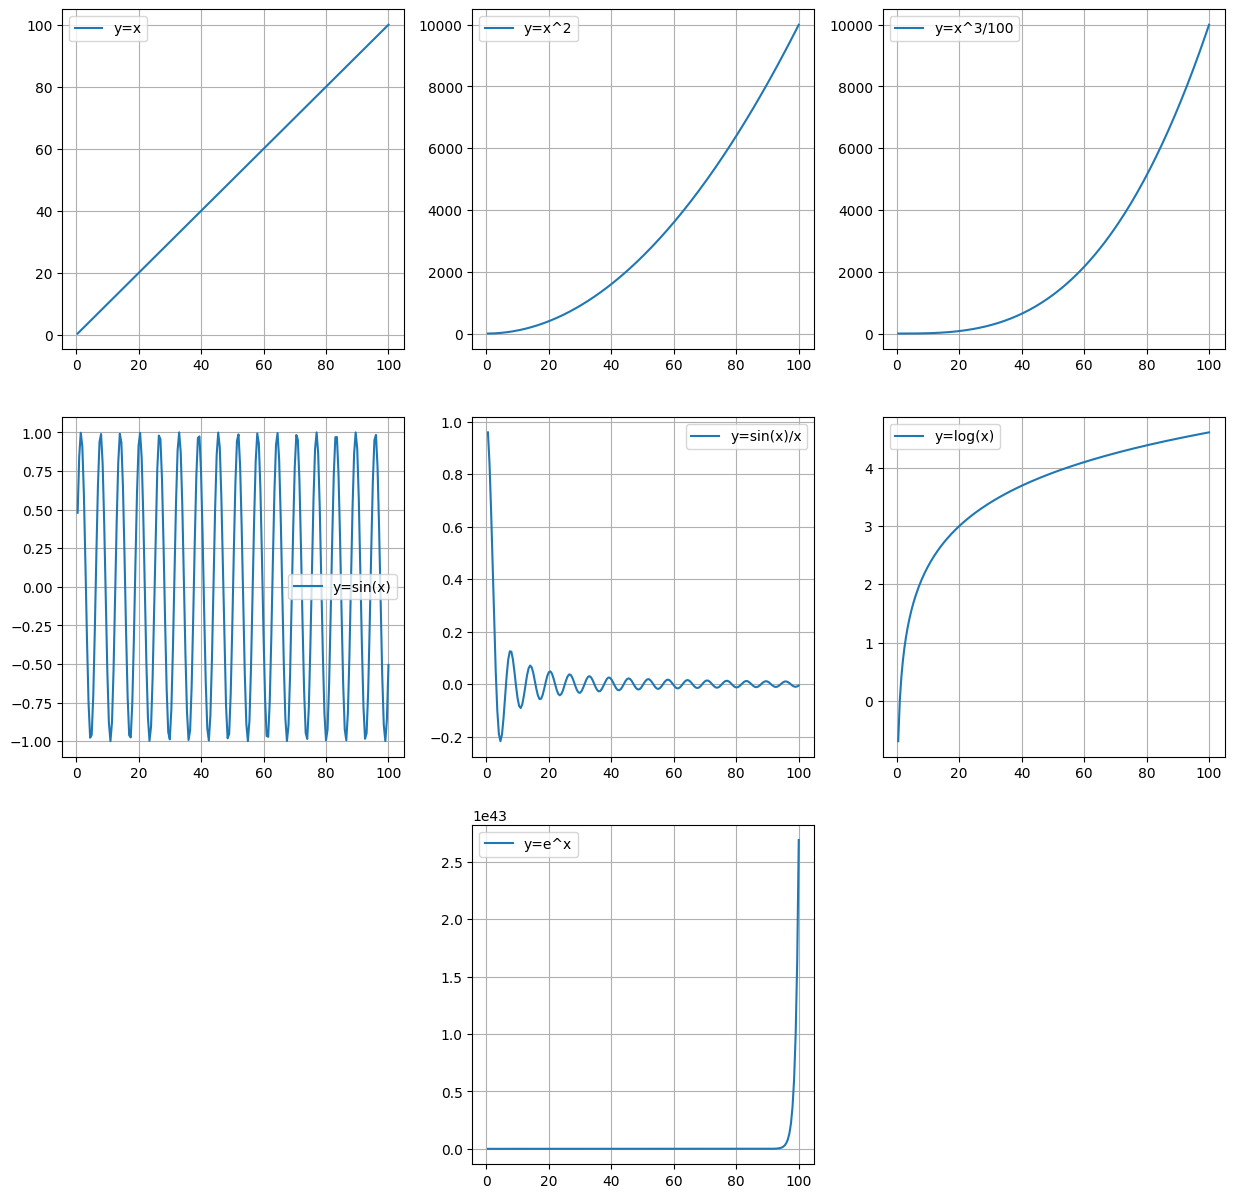

In [66]:
x = np.arange(0.5, 100.1, 0.5)
plt.figure(figsize=(15, 15))

# y = x
plt.subplot(3,3,1)
plt.plot(x, x, label='y=x')
plt.grid()
plt.legend()

# y = x^2
plt.subplot(3,3,2)
plt.plot(x, x**2, label='y=x^2')
plt.grid()
plt.legend()

# y = x^3/100
plt.subplot(3,3,3)
plt.plot(x, (x**3)/100, label='y=x^3/100')
plt.grid()
plt.legend()

# y = sin(x)
plt.subplot(3,3,4)
plt.plot(x, np.sin(x), label='y=sin(x)')
plt.grid()
plt.legend()

# y = sin(x)/x
plt.subplot(3,3,5)
plt.plot(x, np.sin(x)/x, label='y=sin(x)/x')
plt.grid()
plt.legend()

# y = log(x)
plt.subplot(3,3,6)
plt.plot(x, np.log(x), label='y=log(x)')
plt.grid()
plt.legend()

# y = e^x
plt.subplot(3,3,8)
plt.plot(x, np.exp(x), label='y=e^x')
plt.grid()
plt.legend()

plt.show()

## **Question 10**

In [50]:
# Using numpy, generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2
mat = np.random.uniform(1,2,(20,5))

# Using Pandas create a dataframe out of this matrix
df = pd.DataFrame(mat)

# Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”
cols = ["a","b","c","d","e"]
df.columns = cols

# Find the column with the highest standard deviation
Std_dev = df.std(axis = 0)
print("Column with highest Standard Deviation:", Std_dev.idxmax())

# Find the row with the lowest mean
Std_dev_2 = df.mean(axis=1)
print("Row with Lowest Mean:",Std_dev_2.idxmin())

Column with highest Standard Deviation: e
Row with Lowest Mean: 9


## **Question 11**

In [51]:
# Run the cells in Question 10 before running this cell

# Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”.
df['f'] = df.iloc[:,:5].sum(axis = 1)

# Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise.
df['g'] = np.where(df["f"]<8, "LT8", "GT8")

# Find the number of rows in the dataframe where the value in the column “g” is “LT8”.
np.sum(df['g']=='LT8')

#Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.
std_dev_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
print("Std Dev corresponding to 'LT8':",std_dev_lt8)

std_dev_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()
print("Std Dev corresponding to 'GT8':",std_dev_gt8)

Std Dev corresponding to 'LT8': 0.41229123520083505
Std Dev corresponding to 'GT8': 0.21511716225031108


## **Question 12**

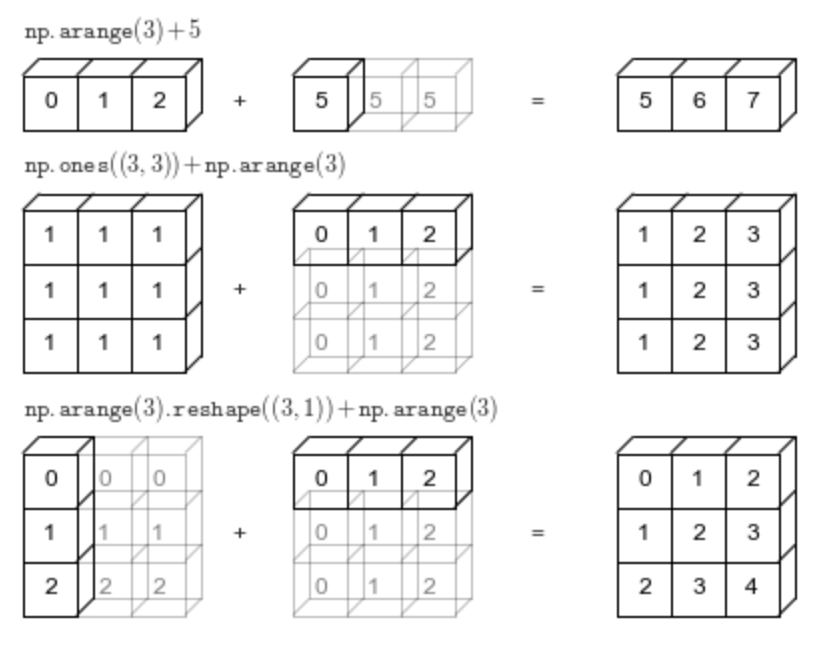

In [54]:
# Examples in Broadcasting
mat = np.arange(3)
print(mat + 5, '\n')

mat = np.ones((3,3))
print(mat + np.arange(3), '\n')

mat = np.arange(3).reshape((3,1))
print(mat * np.arange(3))

[5 6 7] 

[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]] 

[[0 0 0]
 [0 1 2]
 [0 2 4]]


## **Question 13**

In [55]:
# Argmin without numpy
def argmin_(x):
  if len(x) == 0:
    return "Error: Empty Array"
  min_index = 0
  for i in range(len(x)):
    if x[i] < x[min_index]:
      min_index = i
  return min_index

mat = np.array([0,1,3,4,5,6,8,2,9,5,-1,13,35,6])
print("Argmin using python function:",argmin_(mat))

print("Argmin using Numpy inbuilt function:",np.argmin(mat))

Argmin using python function: 10
Argmin using Numpy inbuily function: 10


## **References:**

[1] “NumPy Documentation,” NumPy Documentation. [Online].
Available: https://numpy.org/doc/

[2] “Matplotlib documentation — Matplotlib 3.7.1 documentation,”
Matplotlib documentation — Matplotlib 3.7.1 documentation.
[Online]. Available: https://matplotlib.org/stable/index.html

[3] “pandas documentation — pandas 2.0.0 documentation,” pandas
documentation — pandas 2.0.0 documentation. [Online]. Available:
https://pandas.pydata.org/docs/

[4] “JAX: High-Performance Array Computing — JAX  documentation.”  [Online]. Available: https://jax.readthedocs.io/

[5] “PDE - SymPy 1.12 documentation.”  [Online]. Available: https://docs.sympy.org/latest/modules/solvers/pde.html